<a href="https://colab.research.google.com/github/raffieeey/MasterResearchAutoML/blob/master/tpot/03A_TPOT_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy scipy scikit-learn pandas joblib
!pip install deap update_checker tqdm stopit
!pip install xgboost
!pip install dask[delayed] dask-ml
!pip install scikit-mdr skrebate
!pip install tpot
!pip install pmlb
!pip install pytictoc

     |████████████████████████████████| 153kB 4.7MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11955 sha256=9e416326c0f34ac1f7903fe26cfe8c0f43d619a431058aee70b2e0a8903975db
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
     |████████████████████████████████| 122kB 4.6MB/s 
  Created wheel for scikit-mdr: filename=scikit_MDR-0.4.4-cp36-none-any.whl size=14639 sha256=26698d408380164e44d63c9b09b3d87bcd6c454601fc4aa91aac5375ff7041ae
  Stored in directory: /root/.cache/pip/wheels/ee/50/91/9d48f7807ff574cdbf8f82fc65b7075b23acc9106d3cced38f
  Created wheel for skrebate: filename=skrebate-0.6-cp36-none-any.whl size=29329 sha256=bb4736822fb99540d3c36c5a9763f05435dd6feeb862e0356bdf49addb415a76
  Stored in directory: /root/.cache/pip/wheels/f5/99/36/c827bcfa6852c6d068895b2723c57cea84f93642270c6dc05c
Successfully built scikit-mdr skrebate
     |████████████████████████████████| 8

In [2]:
%matplotlib inline
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np



def get_auc(labels, scores):
    fpr, tpr, thresholds = roc_curve(labels, scores)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score


def get_aucpr(labels, scores):
    precision, recall, th = precision_recall_curve(labels, scores)
    aucpr_score = np.trapz(recall, precision)
    return precision, recall, aucpr_score


def plot_metric(ax, x, y, x_label, y_label, plot_label, style="-"):
    ax.plot(x, y, style, label=plot_label)
    ax.legend()
    
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)


def prediction_summary(labels, predicted_score, info, plot_baseline=True, axes=None):
    if axes is None:
        axes = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

    fpr, tpr, auc_score = get_auc(labels, predicted_score)
    plot_metric(axes[0], fpr, tpr, "False positive rate","True positive rate", "{} AUC = {:.4f}".format(info, auc_score))
    if plot_baseline:
        plot_metric(axes[0], [0, 1], [0, 1], "False positive rate","True positive rate", "baseline AUC = 0.5", "r--")

    precision, recall, aucpr_score = get_aucpr(labels, predicted_score)
    plot_metric(axes[1], recall, precision, "Recall","Precision", "{} AUCPR = {:.4f}".format(info, aucpr_score))
    if plot_baseline:
        thr = (np.sum(labels)/len(labels))[0]
        plot_metric(axes[1], [0, 1], [thr, thr], "Recall","Precision", "baseline AUCPR = {:.4f}".format(thr), "r--")

    plt.show()
    return axes


def figure():
    fig_size = 4.5
    f = plt.figure()
    f.set_figheight(fig_size)
    f.set_figwidth(fig_size*2)

figure()

<Figure size 648x324 with 0 Axes>

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score, log_loss
import numpy as np
import pandas as pd


class CheckBinomial:
  def __init__(self, checkunique):
    self._bintype = 'binomial' if pd.Series(checkunique).nunique() == 2 else 'multinomial'

  def MLMetrics(self):
    if self._bintype == 'binomial':
      return ['accuracy', 'roc_auc', 'neg_log_loss']
    elif self._bintype == 'multinomial':
      return ['accuracy', 'neg_log_loss']

class MetricsCalc:
  def __init__(self, truth, predictions, probab, dattype):
    self.truth = truth
    self.predictions = predictions
    self._target = predictions
    self._probabmax = np.max(probab, axis=1)
    self._probab = probab
    self._type = dattype

  def acc(self):
    return float(accuracy_score(self.truth,self._target))

  def auc(self):
    if self._type == "binomial":
      return float(roc_auc_score(self.truth, self._probabmax))
    elif self._type == "multinomial":
      return np.nan 

  def logloss(self):
    return float(log_loss(self.truth, self._probab))
  
  def cm(self):
    return confusion_matrix(self.truth, self._target)
  
  def f1(self):
    if self._type == "binomial":
      return float(f1_score(self.truth, self._target, average='binary'))
    elif self._type == "multinomial":
      return float(f1_score(self.truth, self._target, average='macro'))

________________________________________________________________________________
*** Dataset Name: adult ***
Elapsed time is 191.632311 seconds.
*** Top algorithm: *** GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.9500000000000001,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


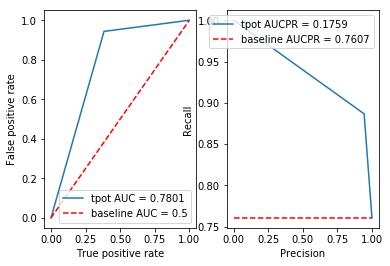

________________________________________________________________________________
*** Dataset Name: adult ***
Elapsed time is 188.498847 seconds.
*** Top algorithm: *** GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.9500000000000001,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


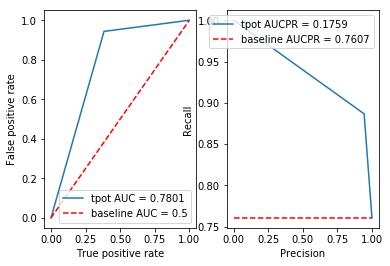

________________________________________________________________________________
*** Dataset Name: adult ***
Elapsed time is 187.337919 seconds.
*** Top algorithm: *** GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.9500000000000001,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


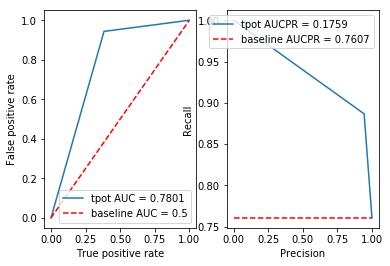

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
Elapsed time is 121.345597 seconds.
*** Top algorithm: *** GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=10,
                           max_features=0.4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.15000000000000002,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


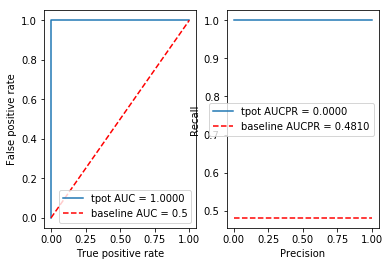

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
Elapsed time is 123.810024 seconds.
*** Top algorithm: *** GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=10,
                           max_features=0.4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.15000000000000002,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


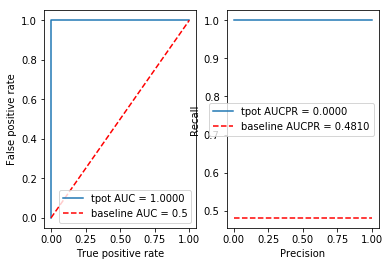

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
Elapsed time is 122.275092 seconds.
*** Top algorithm: *** GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=10,
                           max_features=0.4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.15000000000000002,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


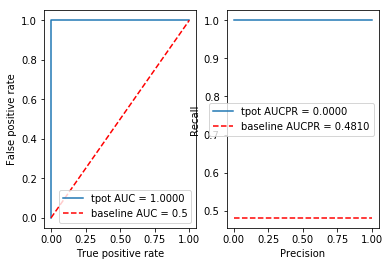

________________________________________________________________________________
*** Dataset Name: churn ***
Elapsed time is 122.744452 seconds.
*** Top algorithm: *** GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=0.8500000000000001, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.7000000000000001,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


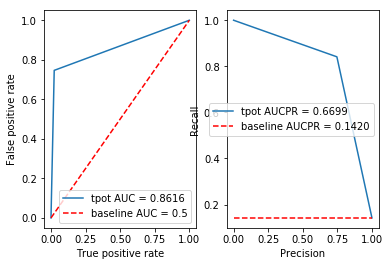

________________________________________________________________________________
*** Dataset Name: churn ***
Elapsed time is 123.638035 seconds.
*** Top algorithm: *** GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=0.8500000000000001, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.7000000000000001,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


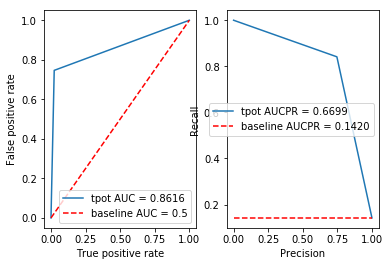

________________________________________________________________________________
*** Dataset Name: churn ***
Elapsed time is 125.218808 seconds.
*** Top algorithm: *** GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=0.8500000000000001, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.7000000000000001,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


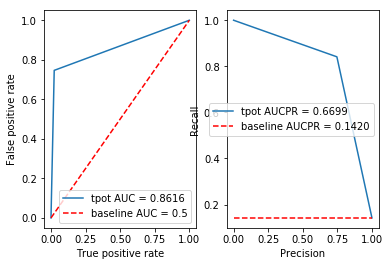

________________________________________________________________________________
*** Dataset Name: nursery ***
Elapsed time is 338.136532 seconds.
*** Top algorithm: *** DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=18, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
________________________________________________________________________________
*** Dataset Name: nursery ***
Elapsed time is 336.056991 seconds.
*** Top algorithm: *** DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Elapsed time is 234.549816 seconds.
*** Top algorithm: *** FeatureUnion(n_jobs=None,
             transformer_list=[('functiontransformer-1',
                                FunctionTransformer(accept_sparse=False,
                                                    check_inverse=True,
                                                    func=<function copy at 0x7f338f8d8ae8>,
                                                    inv_kw_args=None,
                                                    inverse_func=None,
                                                    kw_args=None,
                                                    pass_y='deprecated',
                                                    validate=None)),
                               ('functiontransformer-2',
                                FunctionTransformer(accept_sparse=False,
                                                    check_inverse=True,
                                                    func=<function cop

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Elapsed time is 236.499809 seconds.
*** Top algorithm: *** FeatureUnion(n_jobs=None,
             transformer_list=[('functiontransformer-1',
                                FunctionTransformer(accept_sparse=False,
                                                    check_inverse=True,
                                                    func=<function copy at 0x7f338f8d8ae8>,
                                                    inv_kw_args=None,
                                                    inverse_func=None,
                                                    kw_args=None,
                                                    pass_y='deprecated',
                                                    validate=None)),
                               ('functiontransformer-2',
                                FunctionTransformer(accept_sparse=False,
                                                    check_inverse=True,
                                                    func=<function cop

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Elapsed time is 122.006402 seconds.
*** Top algorithm: *** ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=None, max_features=0.4, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=7, min_samples_split=8,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
________________________________________________________________________________
*** Dataset Name: texture ***
Elapsed time is 121.705131 seconds.
*** Top algorithm: *** ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=None, max_features=0.4, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=7, min_samples_split=8,
    

In [4]:
from pmlb import classification_dataset_names, regression_dataset_names,fetch_data
from tpot import TPOTClassifier, TPOTRegressor
from sklearn.model_selection import train_test_split
from pytictoc import TicToc
import pandas as pd

df_result = pd.DataFrame(columns=["dataset_name", "metrics_recorded", "AUC", "ACC","logloss", "f1_score"])

preds = {}
preds_prob = {}
cm_preds = {}
top_algo = {}
t = TicToc()


sel_clss_dtst = ['adult','agaricus-lepiota', 'churn', 'nursery', 'satimage','texture']
sel_rgrs_dtst = ['294_satellite_image','218_house_8L', '227_cpu_small', '503_wind', '344_mv','215_2dplanes']

ix = 0

for class_dtst in sel_clss_dtst:
  for metrics_test in ['accuracy', 'roc_auc', 'neg_log_loss']:
        print("_"*80)
        print(f"*** Dataset Name: {class_dtst} ***")
        df_result.loc[ix,"dataset_name"] = class_dtst
        df_result.loc[ix,"metrics_recorded"] = metrics_test
        X, y = fetch_data(class_dtst, return_X_y=True)
        c=CheckBinomial(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69, stratify=y)
        X_train = pd.DataFrame(X_train)
        X_test = pd.DataFrame(X_test)
        y_train = pd.DataFrame(y_train).values.ravel()
        y_test = pd.DataFrame(y_test).values.ravel()
        list_metrics = c.MLMetrics()
        tpot = TPOTClassifier(random_state=69, max_time_mins=2, n_jobs=2,  scoring=metrics_test if metrics_test in list_metrics else None)
        t.tic()
        tpot.fit(X_train,y_train)
        t.toc()
        top_algo[class_dtst] = [v[0] for i, v in tpot.pareto_front_fitted_pipelines_.items()][0]
        print("*** Top algorithm: ***", [v[0] for i, v in tpot.pareto_front_fitted_pipelines_.items()][0])
        preds[class_dtst] = tpot.predict(X_test)
        preds_prob[class_dtst] = tpot.predict_proba(X_test)
        p = MetricsCalc(y_test,preds[class_dtst], preds_prob[class_dtst], c._bintype )
        if c._bintype == "binomial":
          df_result.loc[ix,"AUC"] = p.auc()
          df_result.loc[ix,"ACC"] = p.acc()
          df_result.loc[ix,"logloss"] = p.logloss()
          cm_preds[class_dtst] = p.cm()
          df_result.loc[ix,"f1_score"] = p.f1()
          prediction_summary( pd.DataFrame(y_test), preds[class_dtst], "tpot")
          ix+=1
        elif c._bintype == "multinomial":
          df_result.loc[ix,"AUC"] = p.auc()
          df_result.loc[ix,"ACC"] = p.acc()
          df_result.loc[ix,"logloss"] = p.logloss()
          cm_preds[class_dtst] = p.cm()
          df_result.loc[ix,"f1_score"] = p.f1()
          ix+=1

In [5]:
for i, val in enumerate(preds):
  print(preds[val])

[1 1 0 ... 1 1 1]
[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1
 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1
 0 1 1 

In [0]:
for i, val in enumerate(preds):
  pd.DataFrame(preds[val]).to_csv(f"{val}.csv")

In [8]:
df_result

,dataset_name,metrics_recorded,AUC,ACC,logloss,f1_score
0,adult,accuracy,0.707134,0.865302,0.300258,0.914211
1,adult,roc_auc,0.707134,0.865302,0.300258,0.914211
2,adult,neg_log_loss,0.707134,0.865302,0.300258,0.914211
3,agaricus-lepiota,accuracy,0.472488,1,6.11043e-05,1
4,agaricus-lepiota,roc_auc,0.513557,1,3.98841e-05,1
5,agaricus-lepiota,neg_log_loss,0.5,1,9.99201e-16,1
6,churn,accuracy,0.237664,0.944,0.19536,0.791045
7,churn,roc_auc,0.237664,0.944,0.19536,0.791045
8,churn,neg_log_loss,0.237664,0.944,0.19536,0.791045
9,nursery,accuracy,NaN,0.934414,0.132644,0.802692


In [9]:
import pprint
pprint.pprint(cm_preds)

{'adult': array([[ 721,  448],
       [ 210, 3506]]),
 'agaricus-lepiota': array([[423,   0],
       [  0, 392]]),
 'churn': array([[419,  10],
       [ 18,  53]]),
 'nursery': array([[432,   0,   0,   0],
       [  0, 389,  37,   1],
       [  0,  22, 382,   0],
       [  0,  25,   0,   8]]),
 'satimage': array([[150,   1,   1,   0,   1,   0],
       [  0,  67,   0,   1,   2,   0],
       [  1,   0, 132,   3,   0,   0],
       [  0,   0,  10,  43,   0,  10],
       [  2,   1,   0,   0,  63,   5],
       [  0,   0,   2,   8,   0, 141]]),
 'texture': array([[43,  1,  1,  0,  0,  0,  5,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  1,  2,  0,  0,  2],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  1,  4,  0,  1,  1],
       [ 1,  1,  0,  0,  1,  3, 44,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0, 45,  0,  0,  0],
       [ 0,  0,  0, 

In [10]:
top_algo

{'adult': GradientBoostingClassifier(criterion='friedman_mse', init=None,
                            learning_rate=1.0, loss='deviance', max_depth=2,
                            max_features=0.1, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=6, min_samples_split=8,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='auto',
                            random_state=None, subsample=0.9500000000000001,
                            tol=0.0001, validation_fraction=0.1, verbose=0,
                            warm_start=False),
 'agaricus-lepiota': GradientBoostingClassifier(criterion='friedman_mse', init=None,
                            learning_rate=1.0, loss='deviance', max_depth=10,
                            max_features=0.4, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_i